In [123]:
import calendar
from matplotlib import pyplot as plt

In [124]:
TIME_FRAME = 14     # time frame in years

def get_end_month(start_month):
    if start_month == 1:
        return 12
    else:
        return start_month - 1

start_month = 10
start_year = 2005
end_month = get_end_month(start_month)
end_year = start_year + TIME_FRAME

last_day_of_start_month = calendar.monthrange(start_year, start_month)[1]
print(last_day_of_start_month)

last_day_of_end_month = calendar.monthrange(end_year, end_month)[1]
print(last_day_of_end_month)

31
30


In [125]:
from datetime import datetime

start_date = datetime(start_year, start_month, last_day_of_start_month)
end_date = datetime(end_year, end_month, last_day_of_end_month)

print(start_date)
print(end_date)

2005-10-31 00:00:00
2019-09-30 00:00:00


In [126]:
import pandas_datareader.data as web
import pandas as pd
import os

df = web.DataReader('MSFT', 'av-monthly', start_date, end_date, api_key=os.getenv('ALPHAVANTAGE_API_KEY'))

df['employee_price'] = df['close'] * 0.9

print(df.head())
print(df.tail())
# print(df.close)

             open    high    low  close      volume  employee_price
2005-10-31  25.71  25.800  24.25  25.70  1439659900          23.130
2005-11-30  25.61  28.250  25.61  27.68  1444948300          24.912
2005-12-30  27.73  28.101  26.10  26.15  1271695500          23.535
2006-01-31  26.25  28.380  26.10  28.15  1388622700          25.335
2006-02-28  27.95  28.070  26.34  26.87  1047699000          24.183
              open    high     low   close     volume  employee_price
2019-05-31  130.53  130.65  123.04  123.68  547218448         111.312
2019-06-28  123.85  138.40  119.01  133.96  508324437         120.564
2019-07-31  136.63  141.68  134.67  136.27  484553299         122.643
2019-08-30  137.00  140.94  130.78  137.86  585509525         124.074
2019-09-30  136.61  142.37  134.51  139.03  477645820         125.127


In [127]:
monthly_purchase_amount = 500

df['shares_purchased'] = monthly_purchase_amount / df['employee_price']
df['total_shares_held'] = df['shares_purchased'].cumsum()

df['total_value'] = df['total_shares_held'] * df['close']
df['total_amt_invested'] = monthly_purchase_amount * df.index.to_series().rank(method='first')
df['return'] = df['total_value'] - df['total_amt_invested']

# find percentage return
df['percentage_return'] = (df['return'] / df['total_amt_invested']) * 100

# find number of shares purchased and returns made without employee discount
df['shares_purchased_without_discount'] = monthly_purchase_amount / df['close']
df['total_shares_held_without_discount'] = df['shares_purchased_without_discount'].cumsum()

df['total_value_without_discount'] = df['total_shares_held_without_discount'] * df['close']
df['return_without_discount'] = df['total_value_without_discount'] - df['total_amt_invested']


n_rows = df.shape[0]
total_amount_invested = monthly_purchase_amount * n_rows
print("Total amount intested: ", total_amount_invested)

ending_total_value_of_shares = df['total_value'].iloc[-1]
print("Ending total value of shares: ", ending_total_value_of_shares)

df.head().style
df.tail().style

Total amount intested:  84000
Ending total value of shares:  368295.94231209543


,open,high,low,close,volume,employee_price,shares_purchased,total_shares_held,total_value,total_amt_invested,return,percentage_return,shares_purchased_without_discount,total_shares_held_without_discount,total_value_without_discount,return_without_discount
2019-05-31,130.530000,130.650000,123.040000,123.680000,547218448,111.312000,4.491879,2632.789519,325623.407699,82000.000000,243623.407699,297.101717,4.042691,2369.510567,293061.066929,211061.066929
2019-06-28,123.850000,138.400000,119.010000,133.960000,508324437,120.564000,4.147175,2636.936694,353244.039508,82500.000000,270744.039508,328.174593,3.732457,2373.243024,317919.635558,235419.635558
2019-07-31,136.630000,141.680000,134.670000,136.270000,484553299,122.643000,4.076874,2641.013567,359890.918827,83000.000000,276890.918827,333.603517,3.669186,2376.912211,323901.826944,240901.826944
2019-08-30,137.000000,140.940000,130.780000,137.860000,585509525,124.074000,4.029853,2645.043421,364645.685955,83500.000000,281145.685955,336.701420,3.626868,2380.539078,328181.117359,244681.117359
2019-09-30,136.610000,142.370000,134.510000,139.030000,477645820,125.127000,3.995940,2649.039361,368295.942312,84000.000000,284295.942312,338.447550,3.596346,2384.135425,331466.348081,247466.348081


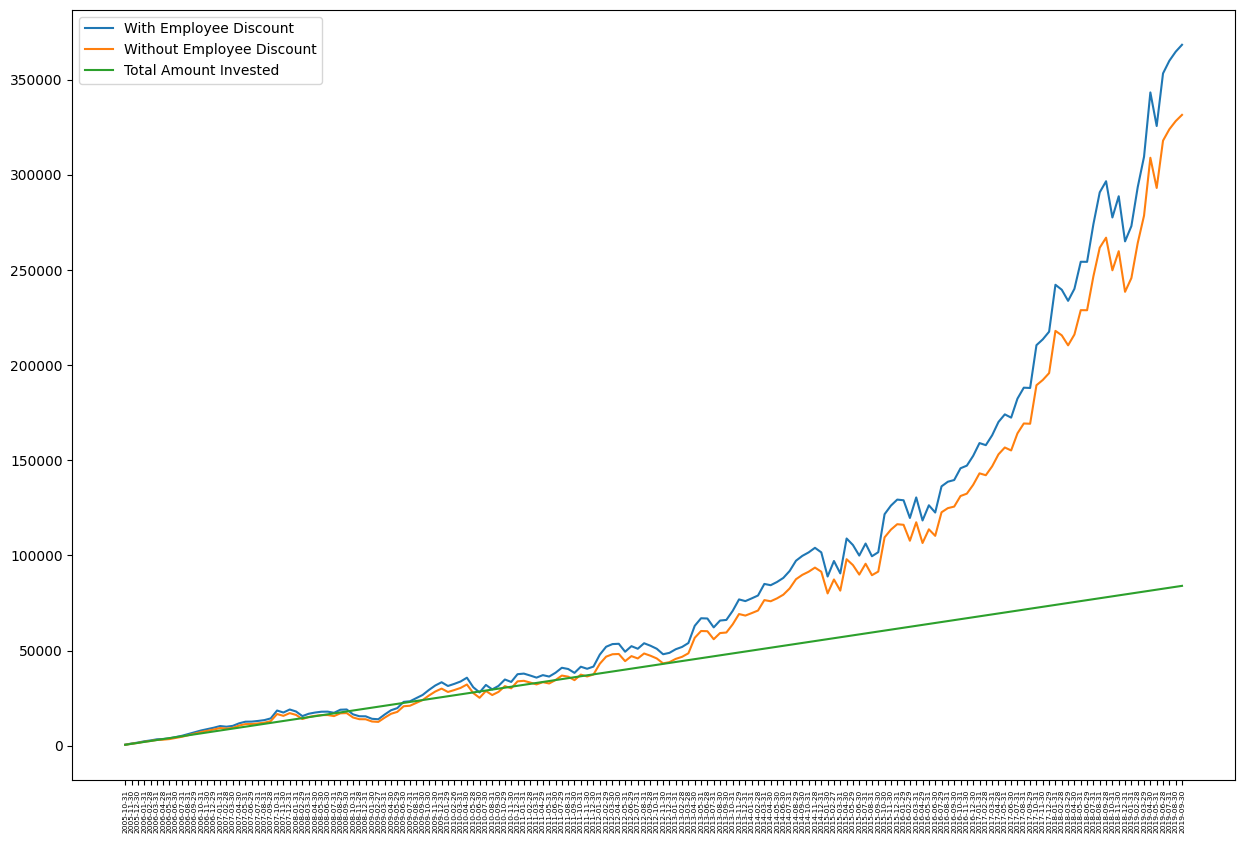

In [128]:
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot()
plt.plot(df.index, df['total_value'], label='With Employee Discount')
plt.plot(df.index, df['total_value_without_discount'], label='Without Employee Discount')
plt.plot(df.index, df['total_amt_invested'], label='Total Amount Invested')
ax.set_xticks(df.index)
ax.set_xticklabels(df.index, rotation=90)
plt.tick_params(axis='x', which='major', labelsize=5.4)
plt.legend()
plt.show()